In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [1]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve

### Data preprocessing

In [4]:
df=pd.read_csv("data/data.csv")

In [60]:
pd.set_option('display.max_columns',None)

In [61]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [11]:
# df.columns

In [9]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
df.dtypes.value_counts()

float64    93
int64       3
Name: count, dtype: int64

In [23]:
print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [31]:
y=df["Bankrupt?"]

In [32]:
df=df.drop("Bankrupt?",axis=1)

In [39]:
y=y.astype("int8")

In [40]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int8

In [36]:
for col in df.select_dtypes(include="float64").columns:
    df[col]=df[col].astype("float32")
    

In [37]:
for col in df.select_dtypes(include="int64").columns:
    df[col]=df[col].astype("int8")

In [48]:
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.502706,0.559802,0.552278,0.605998,0.605976,0.999022,0.797464,0.809375,0.303526,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999094,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8)

In [3]:
import joblib

In [59]:
joblib.dump((x_train,x_test,y_train,y_test),"bankrupt.pkl")

['bankrupt.pkl']

In [25]:
x_train,x_test,y_train,y_test=joblib.load("data/bankrupt.pkl")

Imbalanced classes

In [71]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(Bankrupt?
 0    0.968469
 1    0.031531
 Name: proportion, dtype: float64,
 Bankrupt?
 0    0.964809
 1    0.035191
 Name: proportion, dtype: float64)

Training Models

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve

In [7]:
from sklearn.linear_model import LogisticRegression

if i dont use class_weight=balanced

In [82]:
log_reg=LogisticRegression(max_iter=1000)

(default) penalty- l2, solver-lbfgs, max_iter-100

In [83]:
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1316
           1       0.08      0.02      0.03        48

    accuracy                           0.96      1364
   macro avg       0.52      0.51      0.51      1364
weighted avg       0.93      0.96      0.95      1364



In [78]:
log_reg=LogisticRegression(class_weight="balanced",solver="lbfgs",max_iter=1000)

In [79]:
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [80]:
log_reg.n_iter_

array([600], dtype=int32)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1316
           1       0.05      0.33      0.08        48

    accuracy                           0.73      1364
   macro avg       0.51      0.54      0.46      1364
weighted avg       0.94      0.73      0.82      1364



by using different solver

In [11]:
log_reg=LogisticRegression(max_iter=1000,solver="liblinear",penalty="l2",class_weight="balanced")

In [12]:
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1316
           1       0.05      0.35      0.08        48

    accuracy                           0.73      1364
   macro avg       0.51      0.55      0.46      1364
weighted avg       0.94      0.73      0.82      1364



feature selection using l2, instead of l1 penalty 

In [20]:
# from sklearn.feature_selection import SelectFromModel
# selector=SelectFromModel(log_reg,threshold="mean",prefit=True)
# x_train_select=selector.transform(x_train)
# x_test_select=selector.transform(x_test)

In [17]:
log_reg=LogisticRegression(penalty="l2",max_iter=1000,solver="liblinear",class_weight="balanced")
log_reg.fit(x_train_select,y_train)
y_pred_select=log_reg.predict(x_test_select)
print(classification_report(y_test,y_pred_select))

              precision    recall  f1-score   support

           0       0.99      0.20      0.34      1316
           1       0.04      0.92      0.08        48

    accuracy                           0.23      1364
   macro avg       0.51      0.56      0.21      1364
weighted avg       0.95      0.23      0.33      1364



recall increased from 0.33 to 0.35  
now by using l1 penalty for solver liblinear

In [98]:
log_reg=LogisticRegression(max_iter=2000,class_weight="balanced",solver="liblinear",penalty="l1")

In [21]:
# log_reg.fit(x_train,y_train)
# y_pred=log_reg.predict(x_test)
# print(classification_report(y_test,y_pred))

In [147]:
log_reg.classes_

array([0, 1], dtype=int8)

In [153]:
np.where(log_reg.classes_==1)

(array([1]),)

In [ ]:
coef=log_reg.coef_[0]
selected_features=np.array(x_train.columns)[coef!=0] #(75,1)

In [168]:
joblib.dump(log_reg,"log_reg.pkl")

['log_reg.pkl']

In [8]:
# np.save("features/selected_features.npy",selected_features)
selected_features=np.load("features/selected_features.npy",allow_pickle=True)

By default, it gives 2D array  
for binary classification it gives only one row for probability but for k classes it will give k rows  
here we are selecting second column for positive class

In [121]:
y_proba=log_reg.predict_proba(x_test)[:,1]
precision,recall,thresholds=precision_recall_curve(y_test,y_proba)

In [131]:
recall[:-1]

array([1.        , 1.        , 1.        , ..., 0.04166667, 0.02083333,
       0.        ])

In [137]:
best_f1=0
best_thresh=0
f1_scores=[]
for t in thresholds:
    y_pred=(y_proba>=t).astype(int)
    f1=f1_score(y_pred,y_test)
    f1_scores.append(f1)
    if f1>best_f1:
        best_f1=f1
        best_thresh=t
print(f"best_f1: {best_f1:.2f}")
print(f"best_thresh: {best_thresh:.2f}")        

best_f1: 0.41
best_thresh: 0.67


Why we are using precision[:-1] and recall[:-1]?  
Ans. Both precision and recall has extra one data point for threshold=0 means all positive classes- recall-1

Text(0.5, 1.0, 'Precision-Recall vs Threshold')

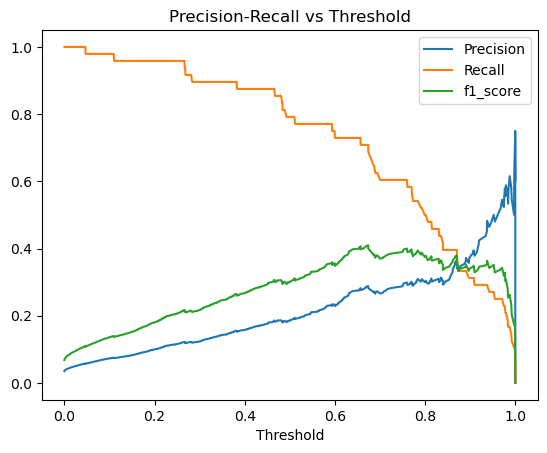

In [139]:
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],label="Recall")
plt.plot(thresholds,f1_scores,label="f1_score")
plt.plot()
plt.legend()
plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold")

In [144]:
y_pred=(y_proba>=0.67).astype(int)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1246
           1       0.71      0.29      0.41       118

    accuracy                           0.93      1364
   macro avg       0.82      0.64      0.69      1364
weighted avg       0.92      0.93      0.91      1364



here precision and recall flipped when using threshold method compared to predict method  
actually there is a big problem that due to l1 regularization and class weights internal decision function is not using 0.5 as threshold yes you can't compare like this 

In [ ]:
# getting the decision boundary threshold used internally (best approximation)
fpr,tpr,thresholds=roc_curve(y_test,y_proba)

In [ ]:
best_f1=0
best_thresh=0
f1_scores=[]
for t in thresholds:
    y_pred=(y_proba>=t).astype(int)
    f1=f1_score(y_pred,y_test)
    f1_scores.append(f1)
    if f1>best_f1:
        best_f1=f1
        best_thresh=t
print(f"best_f1: {best_f1:.2f}")
print(f"best_thresh: {best_thresh:.2f}")   

best_f1: 0.41
best_thresh: 0.67


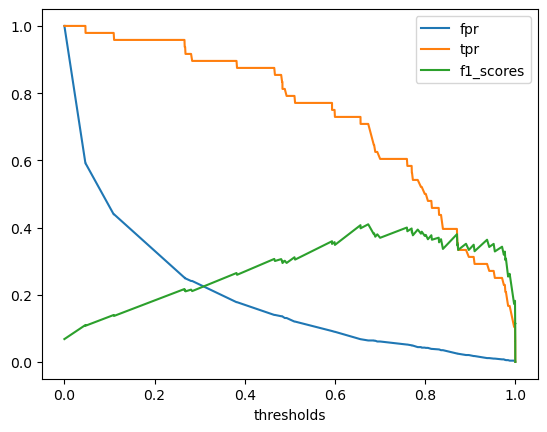

In [167]:
plt.plot(thresholds,fpr,label="fpr")
plt.plot(thresholds,tpr,label="tpr")
plt.plot(thresholds,f1_scores,label="f1_scores")
plt.xlabel("thresholds")
plt.legend()

Text(0, 0.5, 'true positive rate')

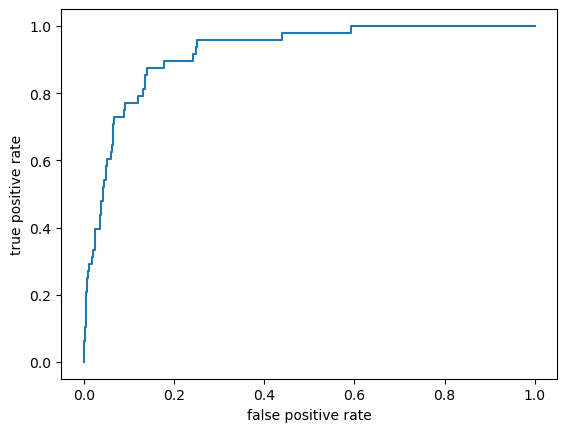

In [163]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

In [ ]:
roc_auc_score(y_test,y_proba) #area

np.float64(0.9213842451874367)

making function for custom threshold

In [14]:
def custom_threshold(model,x_test):
    y_proba=model.predict_proba(x_test)[:,1]
    y_custom=(y_proba>=0.67).astype(int)
    return y_custom

StratifiedKFold for Cross-Validation

In [9]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [16]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [17]:
f1_scores=[]

In [ ]:
for train_index,val_index in skf.split(x_train,y_train):
    

In [ ]:
log_reg=LogisticRegression(class_weight="balanced",penalty="l1",solver="liblinear",max_iter=6000)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_clf=DecisionTreeClassifier(class_weight="balanced",max_depth=5)

In [ ]:
dec_clf.fit(x_train,y_train)
y_pred=dec_clf.predict(x_test)
y_proba=dec_clf.predict_proba(x_test)[:,1]

In [38]:
thresholds=np.linspace(0.3,0.8,50)
f1_scores=[]
for t in thresholds:
    y_pred=(y_proba>=t).astype(int)
    f1=f1_score(y_test,y_pred)
    f1_scores.append(f1)
best_thresh=thresholds[np.argmax(f1_scores)]    

Automating Threshold testing for every model

In [30]:
def threshold_testing(y_proba,y_test):
    thresholds=np.linspace(0.3,0.8,50)
    best_f1=0
    best_thresh=0
    for t in thresholds:
        y_pred=(y_proba>=t).astype(int)
        f1=f1_score(y_test,y_pred)
        if f1>best_f1:
            best_f1=f1
            best_thresh=t
    return best_f1,best_thresh        

In [39]:
best_thresh

np.float64(0.7693877551020407)

In [ ]:
0.7693877551020407,0.9387755102040816

In [40]:
y_pred1=(y_proba>=0.76).astype(int)
y_pred2=(y_pred>=0.93).astype(int)
print(classification_report(y_test,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1316
           1       0.19      0.60      0.29        48

    accuracy                           0.90      1364
   macro avg       0.59      0.76      0.62      1364
weighted avg       0.96      0.90      0.92      1364

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1316
           1       0.20      0.56      0.30        48

    accuracy                           0.91      1364
   macro avg       0.59      0.74      0.62      1364
weighted avg       0.96      0.91      0.93      1364



in this case at thresholds 0.76 and 0.93 f1_score is almost equal(slightly more in 0.93) but recall is higher in 0.76   
missing bankrupt one is more costlier than flagging healthy one

RandomForestClassifier will outperform any single decision tree

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rnd_clf=RandomForestClassifier(
    class_weight="balanced",
    n_estimators=100,
    max_depth=8,
    random_state=42
)

In [71]:
rnd_clf.fit(x_train,y_train)
y_proba=rnd_clf.predict_proba(x_test)[:,1]

In [72]:
best_f1,best_thresh=threshold_testing(y_proba,y_test)

In [73]:
best_thresh

np.float64(0.5040816326530612)

In [74]:
y_pred=(y_proba>=best_thresh).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1316
           1       0.37      0.56      0.45        48

    accuracy                           0.95      1364
   macro avg       0.68      0.76      0.71      1364
weighted avg       0.96      0.95      0.96      1364



In [75]:
y_pred=rnd_clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1316
           1       0.37      0.56      0.45        48

    accuracy                           0.95      1364
   macro avg       0.68      0.76      0.71      1364
weighted avg       0.96      0.95      0.96      1364



In [ ]:
# best=joblib.load("models/random_grid.pkl")
# due to different versions

In [33]:
best=RandomForestClassifier(
    class_weight='balanced',
    max_depth=15,
    min_samples_leaf=10,
    min_samples_split=20,
    bootstrap=True,
    n_estimators=100
)

In [34]:
best.fit(x_train,y_train)
y_proba=best.predict_proba(x_test)[:,1]
best_f1,best_thresh=threshold_testing(y_proba,y_test)
print(f"best_f1 : ${best_f1}, best_thresh : ${best_thresh}")

best_f1 : $0.4122137404580153, best_thresh : $0.5040816326530612


In [35]:
y_pred=best.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1281
           1       0.56      0.33      0.41        83

    accuracy                           0.94      1364
   macro avg       0.76      0.65      0.69      1364
weighted avg       0.93      0.94      0.94      1364



In [36]:
results=pd.read_csv("results/rf_grid_results.csv")

In [37]:
results=results.sort_values(by="mean_test_score",ascending=False)

In [63]:
results[["params","mean_test_score","mean_train_score"]]

,params,mean_test_score,mean_train_score
120,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.493818,0.707591
176,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.493253,0.709335
57,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.487668,0.743490
149,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.486548,0.701576
117,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.486252,0.705748
...,...,...,...
51,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.418573,0.495381
53,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.416430,0.501338
39,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.416200,0.517358
42,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.414890,0.502398


In [38]:
results["overfit_gap"]=results["mean_train_score"]-results["mean_test_score"]

In [67]:
results[["params","mean_test_score","mean_train_score","overfit_gap"]].sort_values(by="overfit_gap",ascending=False).head(5)

,params,mean_test_score,mean_train_score,overfit_gap
162,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.430244,0.880201,0.449957
108,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",0.431554,0.863622,0.432068
164,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.448047,0.878790,0.430743
163,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.453054,0.879772,0.426718
189,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.441928,0.867733,0.425805


converting from strings to dictionary type of params

In [82]:
type(results["params"].iloc[0])

str

In [39]:
import ast
results["params"]=results["params"].apply(ast.literal_eval)

In [40]:
results["max_depth"]=results["params"].apply(lambda x: x["max_depth"])

plotting max_depth vs mean_test_score

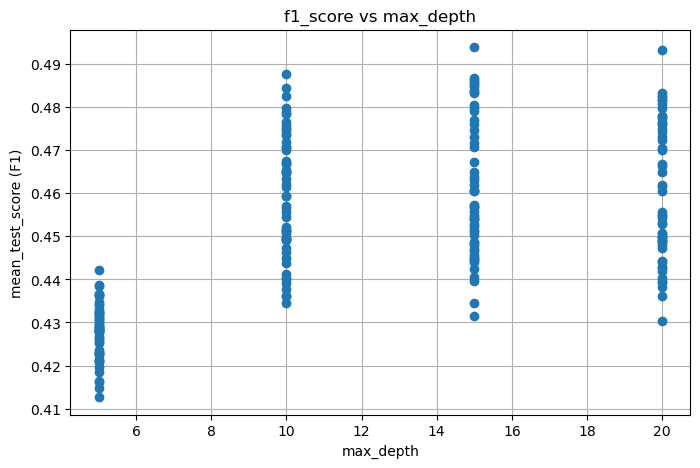

In [87]:
plt.figure(figsize=(8,5))
plt.plot(results["max_depth"],results["mean_test_score"],"o")
plt.xlabel("max_depth")
plt.ylabel("mean_test_score (F1)")
plt.title("f1_score vs max_depth")
plt.grid(True)

f1_score vs n_estimators

In [41]:
results["n_estimators"]=results["params"].apply(lambda x:x["n_estimators"])

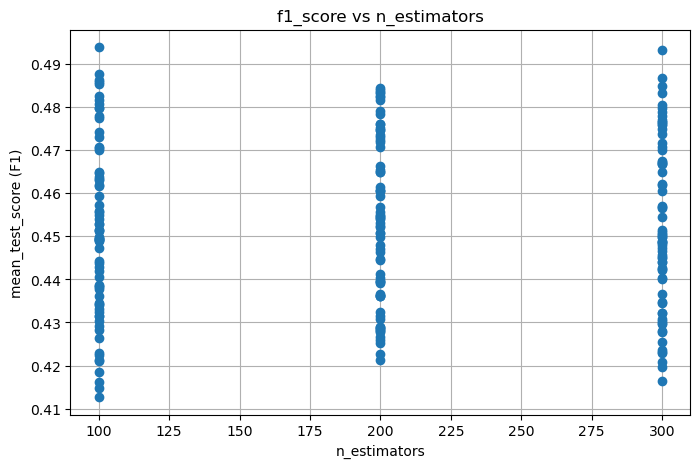

In [89]:
plt.figure(figsize=(8,5))
plt.plot(results["n_estimators"],results["mean_test_score"],"o")
plt.xlabel("n_estimators")
plt.ylabel("mean_test_score (F1)")
plt.title("f1_score vs n_estimators")
plt.grid(True)

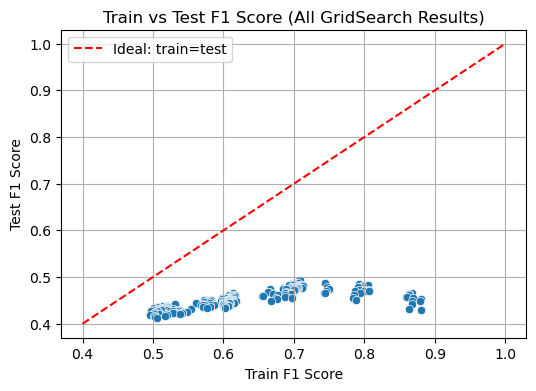

In [50]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="mean_train_score",y="mean_test_score",data=results)
plt.plot([0.4,1.0],[0.4,1.0],'r--',label="Ideal: train=test")
plt.xlabel("Train F1 Score")
plt.ylabel("Test F1 Score")
plt.title("Train vs Test F1 Score (All GridSearch Results)")
plt.legend()
plt.grid(True)

In [44]:
# results.groupby("max_depth")["mean_test_score"].plot(kind="barh")

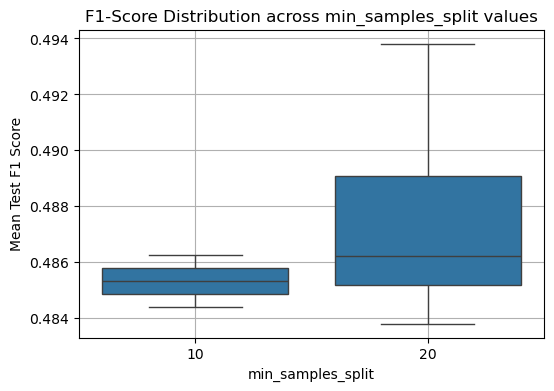

In [54]:
# Plot min_samples_split vs mean_test_score
top_df=results.head(10)
plt.figure(figsize=(6,4))
sns.boxplot(data=top_df, x="param_min_samples_split", y="mean_test_score")
plt.title("F1-Score Distribution across min_samples_split values")
plt.ylabel("Mean Test F1 Score")
plt.xlabel("min_samples_split")
plt.grid(True)

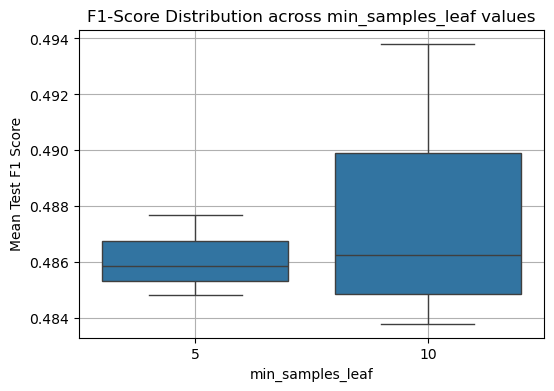

In [56]:
# Plot min_samples_split vs mean_test_score
plt.figure(figsize=(6,4))
sns.boxplot(data=top_df, x="param_min_samples_leaf", y="mean_test_score")
plt.title("F1-Score Distribution across min_samples_leaf values")
plt.ylabel("Mean Test F1 Score")
plt.xlabel("min_samples_leaf")
plt.grid(True)